In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Player Data

In [2]:
players = pd.read_csv('../Resources/tennis_atp-master/atp_players.csv', 
                      header=None,
                      names=['player_id', 'name_first', 'name_last', 'hand', 'birthdate', 'country'],
                      index_col='player_id')

# The format for birthdate is non-standard, and cannot be converted using parse_dates.
players['birthdate'] = pd.to_datetime(players.birthdate, format='%Y%m%d', errors='coerce')

players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55177 entries, 100001 to 210142
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name_first  55000 non-null  object        
 1   name_last   55135 non-null  object        
 2   hand        49399 non-null  object        
 3   birthdate   43532 non-null  datetime64[ns]
 4   country     55122 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.5+ MB


,name_first,name_last,hand,birthdate,country
player_id,,,,,
100001,Gardnar,Mulloy,R,1913-11-22,USA
100002,Pancho,Segura,R,1921-06-20,ECU
100003,Frank,Sedgman,R,1927-10-02,AUS
100004,Giuseppe,Merlo,R,1927-10-11,ITA
100005,Richard Pancho,Gonzales,R,1928-05-09,USA


In [3]:
# L = Left handed
# R = Right handed
# A = Ambidextrous
# U = Unknown

players.hand.value_counts(dropna=False)

U      32612
R      15399
NaN     5778
L       1387
A          1
Name: hand, dtype: int64

In [4]:
# NaN values can be safely converted to U, which represents an unknown value.

players.hand.fillna('U', inplace=True)
players.hand = players.hand.astype('category')

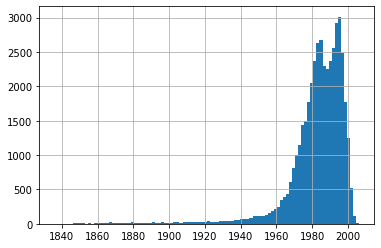

In [7]:
_ = players.birthdate.hist(bins=100)

In [12]:
players.country.value_counts()

USA    8902
ESP    2708
AUS    2564
GER    2443
GBR    2377
       ... 
CUW       1
PLW       1
SWZ       1
COK       1
TGO       1
Name: country, Length: 206, dtype: int64

In [10]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55177 entries, 100001 to 210142
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name_first  55000 non-null  object        
 1   name_last   55135 non-null  object        
 2   hand        55177 non-null  category      
 3   birthdate   43532 non-null  datetime64[ns]
 4   country     55122 non-null  object        
dtypes: category(1), datetime64[ns](1), object(3)
memory usage: 2.2+ MB


In [11]:
players.to_pickle('../Resources/tennis_clean/atp_players.pkl')